In [86]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [87]:
df = pd.read_csv("sleepdata_extracted_filled.csv")
df.head()

,start,end,regularity,ta,tbs,quality
0,0.546980,0.226935,0.960396,0.596506,0.025976,0.849462
1,0.694631,0.229167,0.920792,0.473206,0.019891,0.752688
2,0.696309,0.234375,0.940594,0.461154,0.020318,0.763441
3,0.919463,0.340774,0.801980,0.417990,0.021012,0.698925
4,0.644295,0.235863,0.584158,0.506547,0.022702,0.709677


In [88]:
df.describe()

,start,end,regularity,ta,tbs,quality
count,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000
mean,0.618167,0.236679,0.846174,0.485125,0.160161,0.712968
std,0.089566,0.105987,0.112952,0.094853,0.181623,0.183908
min,0.310705,0.000000,0.000000,0.099814,0.013862,0.184269
25%,0.560403,0.186801,0.816297,0.426764,0.070625,0.634409
50%,0.605705,0.222470,0.871287,0.487842,0.088923,0.752688
75%,0.666107,0.259673,0.910891,0.543221,0.188877,0.838710
max,1.000000,1.065750,1.012990,1.000000,1.000000,1.000000


In [89]:
df.sort_values(by="quality", ascending=True).head(30)

,start,end,regularity,ta,tbs,quality
1011,0.492002,0.952055,0.395904,0.099814,0.015567,0.184269
1012,0.499382,0.966336,0.401843,0.101311,0.015800,0.187033
1013,0.499610,0.966777,0.402026,0.101357,0.015807,0.187118
927,0.501275,0.970000,0.403366,0.101695,0.015860,0.187742
1014,0.507104,0.981279,0.408057,0.102878,0.016044,0.189925
1015,0.507218,0.981500,0.408149,0.102901,0.016048,0.189968
965,0.508794,0.984550,0.409417,0.103220,0.016098,0.190558
936,0.509027,0.985000,0.409604,0.103268,0.016105,0.190645
1016,0.514826,0.996223,0.414271,0.104444,0.016289,0.192817
966,0.516662,0.999775,0.415748,0.104817,0.016347,0.193505


### Separate features and target

In [90]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [91]:
x.head()

,start,end,regularity,ta,tbs
0,0.546980,0.226935,0.960396,0.596506,0.025976
1,0.694631,0.229167,0.920792,0.473206,0.019891
2,0.696309,0.234375,0.940594,0.461154,0.020318
3,0.919463,0.340774,0.801980,0.417990,0.021012
4,0.644295,0.235863,0.584158,0.506547,0.022702


In [92]:
y.head()

,quality
0,0.849462
1,0.752688
2,0.763441
3,0.698925
4,0.709677


## Check data distribution

In [93]:

def map_value(val):
    if val > 0.80:
        return 'Excellent'
    elif val > 0.60:
        return 'Good'
    elif val > 0.40:
        return 'Average'
    elif val > 0.20:
        return 'Fair'
    else:
        return 'Poor'
df_norm_target_categorical = pd.DataFrame(df, columns=["quality"])
df_norm_target_categorical['quality'] = df['quality'].apply(map_value)
df_norm_target_categorical['quality'].value_counts()

Good         473
Excellent    353
Average      137
Fair          77
Poor          13
Name: quality, dtype: int64

## Model

In [94]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [95]:
input_shape = (x.shape[1],)
input_shape

(5,)

In [96]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=input_shape),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

In [97]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["mae", "mse", "accuracy"])

In [98]:
validation_data = (X_test, y_test)
history = model.fit(X_train, y_train, epochs=100, validation_data=validation_data)

Epoch 1/100
27/27 [==============================] - 0s 10ms/step - loss: 0.6480 - mae: 0.2113 - mse: 0.0566 - accuracy: 0.0333 - val_loss: 0.6215 - val_mae: 0.1850 - val_mse: 0.0443 - val_accuracy: 0.0427
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6112 - mae: 0.1683 - mse: 0.0389 - accuracy: 0.0333 - val_loss: 0.5939 - val_mae: 0.1466 - val_mse: 0.0315 - val_accuracy: 0.0427
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 0.5964 - mae: 0.1426 - mse: 0.0323 - accuracy: 0.0333 - val_loss: 0.5863 - val_mae: 0.1308 - val_mse: 0.0284 - val_accuracy: 0.0427
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 0.5941 - mae: 0.1366 - mse: 0.0314 - accuracy: 0.0333 - val_loss: 0.5857 - val_mae: 0.1310 - val_mse: 0.0281 - val_accuracy: 0.0427
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 0.5931 - mae: 0.1372 - mse: 0.0309 - accuracy: 0.0333 - val_loss: 0.5845 - val_mae: 0.1282 - val_mse: 0.02

## Evaluation

In [99]:
mae = history.history['mae']
val_mae = history.history['val_mae']
mse = history.history['mse']
val_mse = history.history['val_mse']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(mae))

In [100]:
print("Training MAE:", mae[-1])
print("Testing MAE:", val_mae[-1])

print("\nTraining MSE:", mse[-1])
print("Testing MSE:", val_mse[-1])

print("\nTraining loss:", loss[-1])
print("Testing loss:", val_loss[-1])


Training MAE: 0.1066632866859436
Testing MAE: 0.09943605214357376

Training MSE: 0.020231226459145546
Testing MSE: 0.01817692257463932

Training loss: 0.5671709775924683
Testing loss: 0.5617164969444275


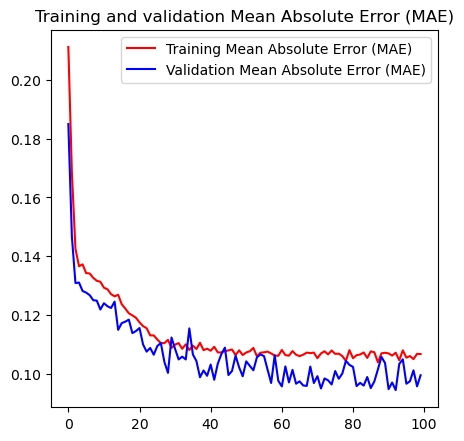

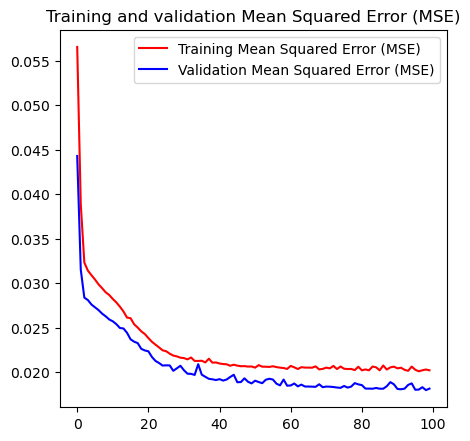

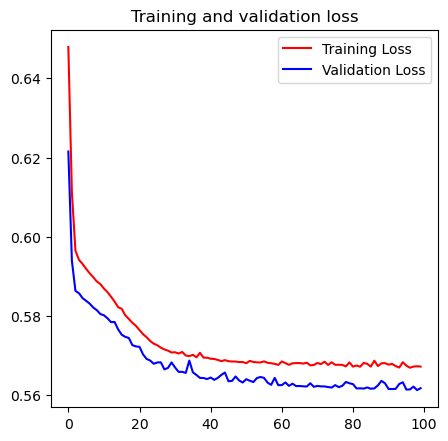

In [101]:
# MAE
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(epochs, mae, 'r', label='Training Mean Absolute Error (MAE)')
plt.plot(epochs, val_mae, 'b', label='Validation Mean Absolute Error (MAE)')
plt.title('Training and validation Mean Absolute Error (MAE)')
plt.legend()

# MSE
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(epochs, mse, 'r', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse, 'b', label='Validation Mean Squared Error (MSE)')
plt.title('Training and validation Mean Squared Error (MSE)')
plt.legend()

# Loss
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [105]:
from sklearn.preprocessing import MinMaxScaler

MMScaler_features = MinMaxScaler()

MMScaler_target = MinMaxScaler()
new_data = pd.DataFrame([[83460, 22380, 92, 23132.5, 168.9]], columns=x.columns) # quality = 77
normalized_data = pd.DataFrame(MMScaler_features.transform(new_data), columns=x.columns)
predictions = model.predict(normalized_data)

predictions

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:

denormalized_predictions = MMScaler_target.inverse_transform(predictions)

denormalized_predictions